In [1]:
from LibLv1 import *
is_gpu_available()

TensorFlow version: 2.10.0
GPU disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
GPU 0 est activé avec gestion dynamique de la mémoire.


True

In [ ]:
data_dir = r'Dataset/4classes'
image_h = 224
image_w = 224
batch_s = 32
image_size = (image_h, image_w)  
save_model_path = r"models/Custom_4classes_best_weights.h5"


Found 36082 files belonging to 4 classes.
Using 28866 files for training.
Found 36082 files belonging to 4 classes.
Using 7216 files for validation.
Classes détectées : ['Painting', 'Photo', 'SchematicsOrSketch', 'Text']


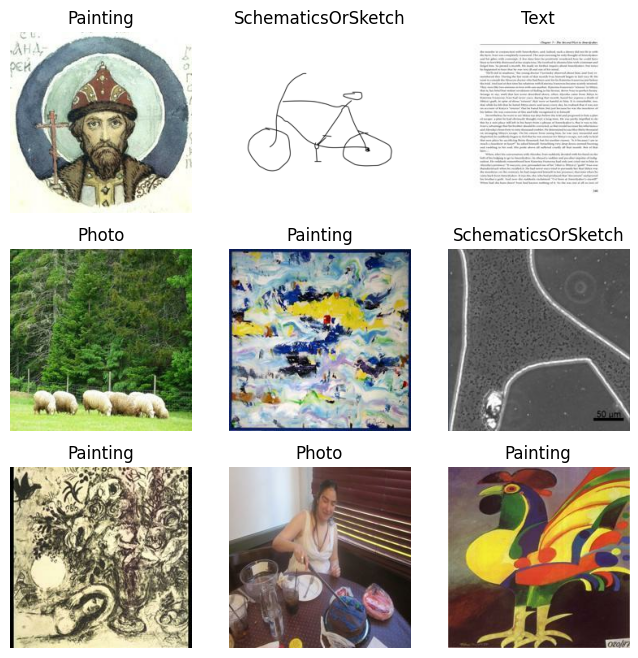

In [6]:
#preprocess_images(data_dir)
# Jeu d'entraînement (80% des données)
train_set, test_set = prepare_data(data_dir)
class_names = test_set.class_names
print("Classes détectées :", class_names)

plt.figure(figsize=(8, 8))
for images, labels in train_set.take(1):  
    for i in range(9): 
        ax = plt.subplot(3, 3, i + 1) 
        plt.imshow(images[i].numpy().astype("uint8"))  
        plt.title(class_names[labels[i].numpy()])  
        plt.axis("off") 
plt.show()

Verifier les classes :

In [7]:
model = Create_Sequential((image_h , image_w  , 3 ) , len(class_names)  , ShowSummary=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                          

In [8]:
with tf.device('/GPU:1'):
    history = TrainModel(
    model=model,
    train_set=train_set,
    test_set=test_set,
    nbEpochs=100,
    UseEarlyStopping=True , 
    modelCheckpoint=save_model_path
    )

Erreur lors du chargement des poids : Cannot assign value to variable ' dense_1/kernel:0': Shape mismatch.The variable shape (256, 4), and the assigned value shape (256, 2) are incompatible.
Epoch 1/100
903/903 [==============================] - ETA: 0s - loss: 0.6461 - accuracy: 0.8138
Epoch 1: val_loss improved from inf to 0.64673, saving model to models\Custom_Bin_best_weights.h5
903/903 [==============================] - 549s 602ms/step - loss: 0.6461 - accuracy: 0.8138 - val_loss: 0.6467 - val_accuracy: 0.7851
Epoch 2/100
902/903 [============================>.] - ETA: 0s - loss: 0.3613 - accuracy: 0.8659
Epoch 2: val_loss did not improve from 0.64673
903/903 [==============================] - 365s 404ms/step - loss: 0.3612 - accuracy: 0.8659 - val_loss: 0.8807 - val_accuracy: 0.7435
Epoch 3/100
902/903 [============================>.] - ETA: 0s - loss: 0.3149 - accuracy: 0.8812
Epoch 3: val_loss did not improve from 0.64673
903/903 [==============================] - 358s 397ms/st

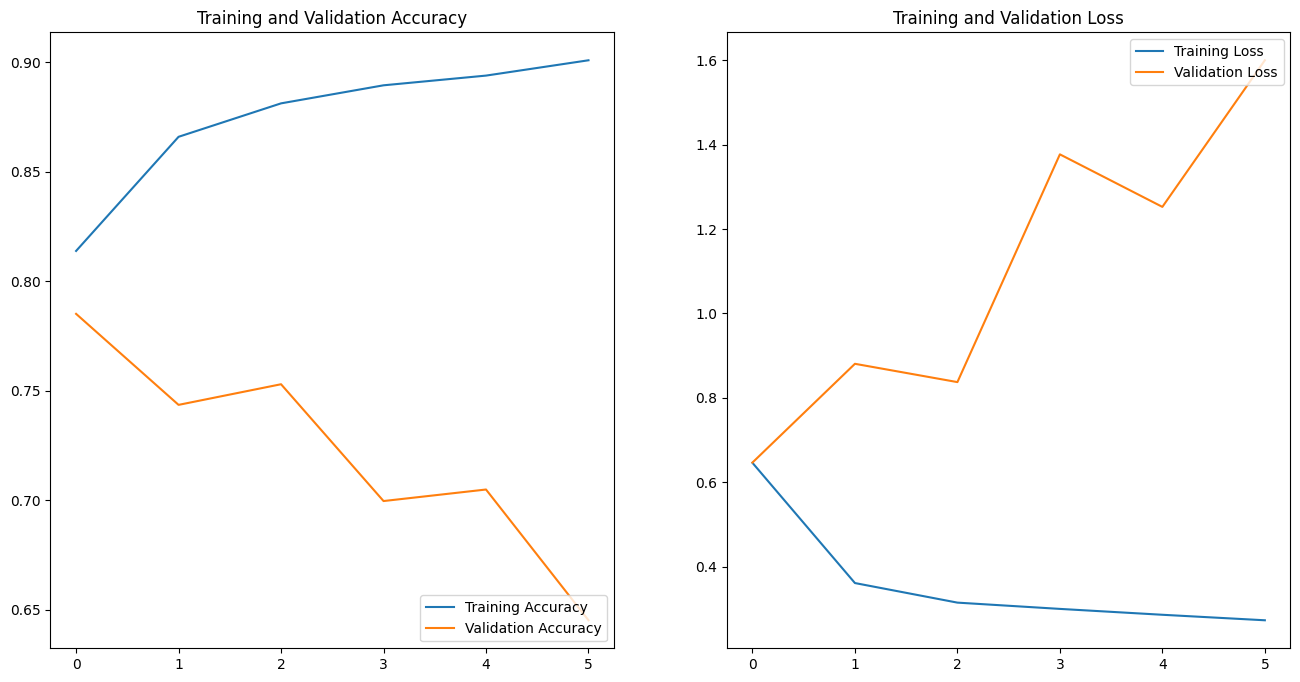

In [9]:
displayHistoryData(history.history['accuracy'] , history.history['val_accuracy'] , history.history['loss'], history.history['val_loss'] , len(history.history['accuracy'])) 

1/1 [==============================] - 0s 111ms/step
Vérification des lignes (%): [100. 100. 100. 100.]


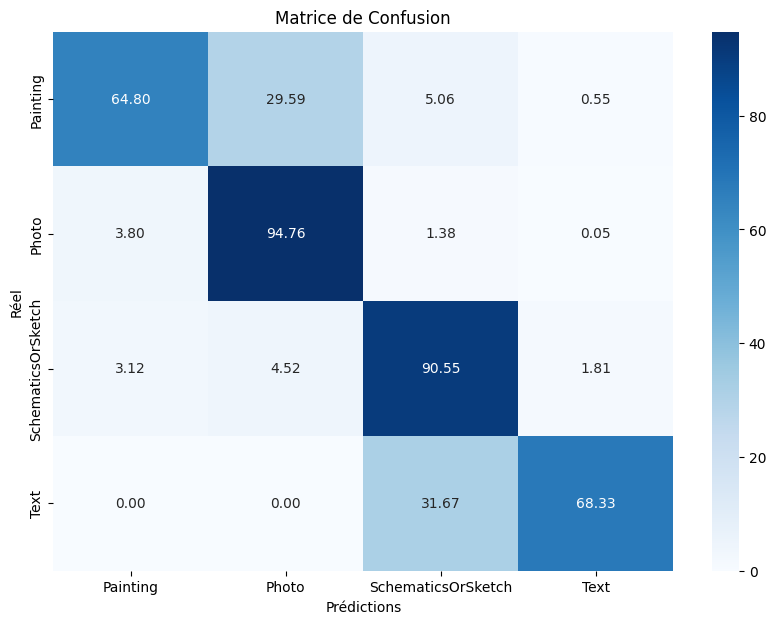

In [10]:
plot_confusion_matrix(model ,test_set , class_names)

226/226 [==============================] - 6s 27ms/step - loss: 0.6467 - accuracy: 0.7851
Évaluation sur le jeu de test - Accuracy: 0.79, Loss: 0.6467
1/1 [==============================] - 0s 358ms/step
Classe prédite: Photo avec une confiance de 0.54


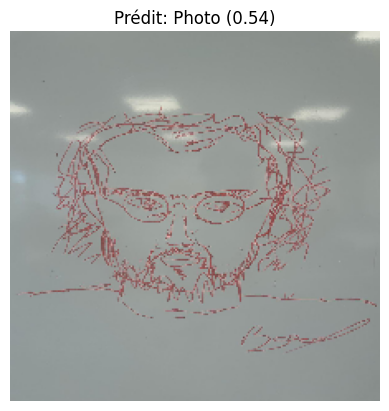

226/226 [==============================] - 6s 27ms/step - loss: 0.6467 - accuracy: 0.7851
Évaluation sur le jeu de test - Accuracy: 0.79, Loss: 0.6467
1/1 [==============================] - 0s 22ms/step
Classe prédite: Photo avec une confiance de 0.95


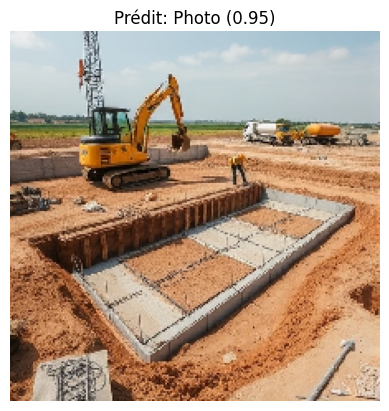

226/226 [==============================] - 6s 28ms/step - loss: 0.6467 - accuracy: 0.7851
Évaluation sur le jeu de test - Accuracy: 0.79, Loss: 0.6467
1/1 [==============================] - 0s 22ms/step
Classe prédite: Photo avec une confiance de 0.98


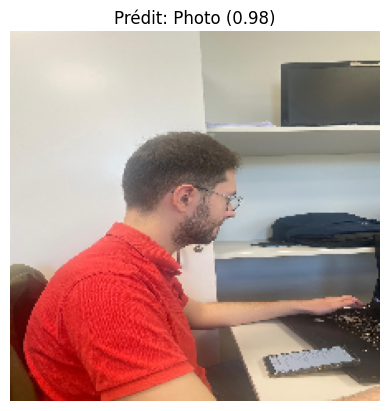

226/226 [==============================] - 6s 27ms/step - loss: 0.6467 - accuracy: 0.7851
Évaluation sur le jeu de test - Accuracy: 0.79, Loss: 0.6467
1/1 [==============================] - 0s 24ms/step
Classe prédite: SchematicsOrSketch avec une confiance de 1.00


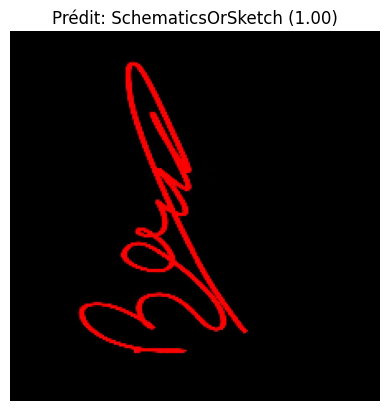

226/226 [==============================] - 6s 26ms/step - loss: 0.6467 - accuracy: 0.7851
Évaluation sur le jeu de test - Accuracy: 0.79, Loss: 0.6467
1/1 [==============================] - 0s 20ms/step
Classe prédite: SchematicsOrSketch avec une confiance de 1.00


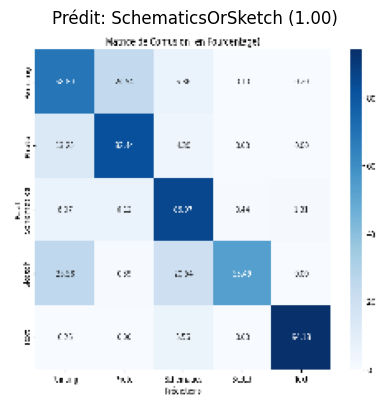

In [11]:
with tf.device('/GPU:1'):
    model.load_weights(save_model_path)
    test_model(model, test_set, "testResult/lorenzo.jpg", class_names  , image_size )
    test_model(model, test_set, "testResult/7b3cb7d3-c8e0-4852-97df-017ceac60c23.jpeg", class_names , image_size)
    test_model(model, test_set, "testResult/WhatsApp Image 2025-04-08 à 10.02.35_57384aa3.jpg", class_names , image_size)
    test_model(model, test_set, "testResult/WhatsApp Image 2025-04-08 à 10.02.35_b655e5ba.jpg", class_names , image_size)
    test_model(model, test_set, "testResult/output.png", class_names , image_size)